In [1]:
from __future__ import division, print_function, unicode_literals #support py 2/3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#to fix label size
plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
%matplotlib inline 
#for nice displays

np.random.seed(42) #to make stable runs across different machines

## Linear Regression with Normal Equation (MSE -mean squared error)

In [2]:
x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.randn(100,1)

In [3]:
x

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516],
       [0.04116899],
       [1.9398197 ],
       [1.66488528],
       [0.42467822],
       [0.36364993],
       [0.36680902],
       [0.60848449],
       [1.04951286],
       [0.86389004],
       [0.58245828],
       [1.22370579],
       [0.27898772],
       [0.5842893 ],
       [0.73272369],
       [0.91213997],
       [1.57035192],
       [0.39934756],
       [1.02846888],
       [1.18482914],
       [0.09290083],
       [1.2150897 ],
       [0.34104825],
       [0.13010319],
       [1.89777107],
       [1.93126407],
       [1.6167947 ],
       [0.60922754],
       [0.19534423],
       [1.36846605],
       [0.88030499],
       [0.24407647],
       [0.99035382],
       [0.06877704],
       [1.8186408 ],
       [0.51755996],
       [1.32504457],
       [0.62342215],
       [1.040

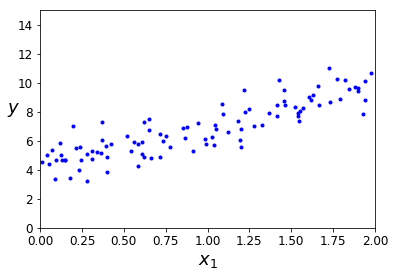

In [4]:
plt.plot(x,y,"b.")
plt.xlabel("$x_1$" ,fontsize=18)
plt.ylabel("$y$" ,rotation=0,fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [5]:
x_b = np.c_[np.ones((100,1)),x]#add x0=1 to each instance
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T.dot(y))

In [6]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [7]:
#get some predictions using the new theta that we have found
x_new = np.array([[0],[2]])
x_new_b = np.c_[np.ones((2,1)), x_new]
y_predict = x_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

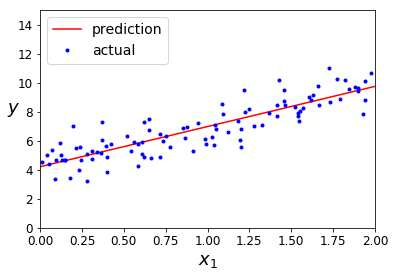

In [8]:
plt.plot(x_new,y_predict,"r-",label='prediction')
plt.plot(x,y,"b.",label='actual')
plt.axis([0,2,0,15])
plt.xlabel("$x_1$" ,fontsize=18)
plt.ylabel("$y$" ,rotation=0,fontsize=18)
plt.legend(loc = "upper left", fontsize =14)
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x,y)

#intercept = w0(bias term), coef =w1
regressor.intercept_, regressor.coef_

(array([4.21509616]), array([[2.77011339]]))

In [10]:
regressor.predict(x_new)

array([[4.21509616],
       [9.75532293]])

## Linear Regression using batch gradient descent (one of many GD besides Stoshastic GD, Mini batch GD)

In [11]:
# learning rate/step size
eta =0.1
n_iterations =1000
m=100
theta = np.random.randn(2,1)

for iteration in range (n_iterations):
    gradients = 2/m *x_b.T.dot(x_b.dot(theta)-y)
    #cost function iterations
    theta=theta-eta * gradients

In [12]:
theta

array([[4.21509616],
       [2.77011339]])

In [13]:
x_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

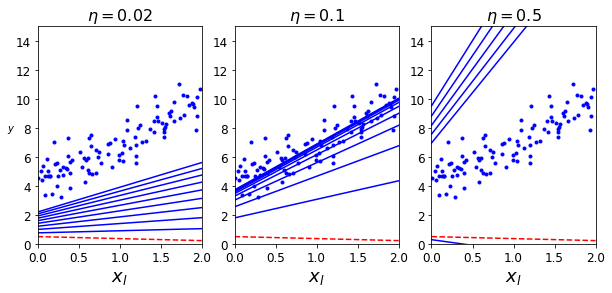

In [14]:
#to see the effect learning rate
theta_path_bgd = []
def plot_gradient_descent(theta,eta,theta_path=None):
    m =len(x_b)
    plt.plot(x,y,"b.")
    n_iterations =1000
    for iteration in range(n_iterations):
        if iteration<10:
            y_predict=x_new_b.dot(theta)
            style="b-" if iteration >0 else "r--"
            plt.plot(x_new,y_predict,style)
        gradients=2/m *x_b.T.dot(x_b.dot(theta)-y)
        theta=theta-eta*gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_l$",fontsize=18)
    plt.axis([0,2,0,15])
    plt.title(r"$\eta={}$".format(eta),fontsize=16)
    
np.random.seed(42)
theta=np.random.randn(2,1) #random initialization

plt.figure(figsize=(10,4))
plt.subplot(131)
plot_gradient_descent(theta,eta=0.02)
plt.ylabel("$y$", rotation=0,fontsize=10)
plt.subplot(132)
plot_gradient_descent(theta,eta=0.1,theta_path=theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta,eta=0.5)